In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from speechsep.imports import *

In [ ]:
class SiameseImage(Tuple):
    def show(self, ctx=None, **kwargs): 
        img1,img2,same_breed = self
        return show_image(torch.cat([img1,img2], dim=2), title=same_breed, ctx=ctx)

In [ ]:
class SiamesePair(Transform):
    def __init__(self,items,labels):
        self.items,self.labels,self.assoc = items,labels,self
        sortlbl = sorted(enumerate(labels), key=itemgetter(1))
        # dict of (each unique label) -- (list of indices with that label)
        self.clsmap = {k:L(v).itemgot(0) for k,v in itertools.groupby(sortlbl, key=itemgetter(1))}
        self.idxs = range_of(self.items)
        
    def encodes(self,i):
        "x: tuple of `i`th image and a random image from same or different class; y: True if same class"
        othercls = self.clsmap[self.labels[i]] if random.random()>0.5 else self.idxs
        otherit = random.choice(othercls)
        return SiameseImage(self.items[i], self.items[otherit], self.labels[otherit]==self.labels[i])

In [ ]:
def resized_image(fn:Path, sz=128):
    x = Image.open(fn).convert('RGB').resize((sz,sz))
    # Convert image to tensor for modeling
    return tensor(array(x)).permute(2,0,1).float()/255.

In [ ]:
source = untar_data(URLs.PETS)/'images'
items = get_image_files(source)

In [ ]:
OpenAndResize = TupleTransform(resized_image)
labeller = RegexLabeller(pat = r'/([^/]+)_\d+.jpg$')
sp = SiamesePair(items, items.map(labeller))
pipe = Pipeline([sp, OpenAndResize], as_item=True)
x,y,z = t = pipe(0)
x.shape,y.shape,z

(torch.Size([3, 128, 128]), torch.Size([3, 128, 128]), False)

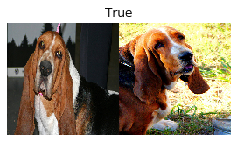

In [ ]:
pipe.show(pipe(0))

In [ ]:
dsrc

# numeric test

In [ ]:
plus_one = lambda x: x+1
ds = DataSource(range(10), [plus_one]).databunch()

In [ ]:
ds = DataSource(range(100), [plus_one]).databunch()

In [ ]:
ds.show_batch()